In [13]:
%pylab inline
import os
import numpy as np
pltDir=os.path.join(os.environ['homeWrk'],'FPFS2','sim','plot','demo')

Populating the interactive namespace from numpy and matplotlib


In [3]:
def shapeletsPrepare(nord,ngrid,sigma):
    # prepare the shapelets function
    mord    =   nord
    rfunc   =   np.zeros((ngrid,ngrid))
    afunc   =   np.zeros((ngrid,ngrid))
    lfunc   =   np.zeros((nord+1,mord+1,ngrid,ngrid))
    chiC    =   np.zeros((nord+1,mord+1,ngrid,ngrid))
    chiS    =   np.zeros((nord+1,mord+1,ngrid,ngrid))
    #set up the r*r and theta function
    for j in range(ngrid):
        for i in range(ngrid):
            x   =   (i-ngrid/2.)/sigma
            y   =   (j-ngrid/2.)/sigma
            r   =   np.sqrt(x**2.+y**2.)
            rfunc[j,i]=r
            if r==0:
                afunc[j,i]=0
            elif y>=0:
                afunc[j,i]=np.arccos(x/r)
            elif y<0:
                afunc[j,i]=-np.arccos(x/r)
    #set up l function
    for n in range(nord+1):
        for m in range(mord+1):
            if n==0:
                lfunc[n,m,:,:]=1.
            elif n==1:
                lfunc[n,m,:,:]=m+1.-rfunc*rfunc
            elif n>1:
                lfunc[n,m,:,:]=(2.+(m-1.-rfunc*rfunc)/n)*lfunc[n-1,m,:,:]-(1.+(m-1.)/n)*lfunc[n-2,m,:,:]
    
    for nn in range(nord+1):
        for mm in range(nn,-1,-2):
            c1=(nn-abs(mm))/2
            d1=(nn+abs(mm))/2
            cc=np.math.factorial(c1)+0.
            dd=np.math.factorial(d1)+0.
            cc=cc/dd/np.pi
            chiC[nn,mm,:,:]=pow(-1.,d1)/sigma*pow(cc,0.5)*lfunc[np.int(c1),abs(mm),:,:]*pow(rfunc,abs(mm))*np.exp(-rfunc*rfunc/2.)*np.cos(mm*afunc)
            chiS[nn,mm,:,:]=pow(-1.,d1)/sigma*pow(cc,0.5)*lfunc[np.int(c1),abs(mm),:,:]*pow(rfunc,abs(mm))*np.exp(-rfunc*rfunc/2.)*np.sin(mm*afunc)
    return (chiC,chiS)

In [4]:
basis=shapeletsPrepare(4,32,3)
chiCBasis=basis[0]
chiSBasis=basis[1]

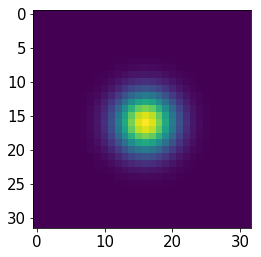

In [5]:
imshow(chiCBasis[0,0])

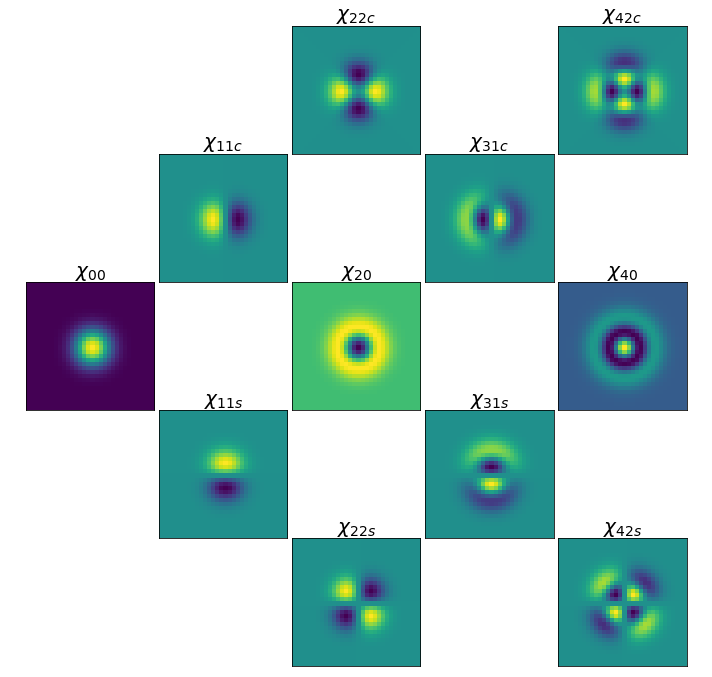

In [8]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10),
            subplot_kw={'xticks': [], 'yticks': []},frameon=False)
axfla=axes.flat
axfla[0].axis('off')
axfla[1].axis('off')
fs=20
axfla[2].imshow(chiCBasis[2,2])
axfla[2].set_title(r'$\chi_{22c}$',weight='bold',fontsize=fs)
axfla[3].axis('off')
axfla[4].imshow(chiCBasis[4,2])
axfla[4].set_title(r'$\chi_{42c}$',weight='bold',fontsize=fs)

axfla[5].axis('off')
axfla[6].imshow(chiCBasis[1,1])
axfla[6].set_title(r'$\chi_{11c}$',weight='bold',fontsize=fs)
axfla[7].axis('off')
axfla[8].imshow(chiCBasis[3,1])
axfla[8].set_title(r'$\chi_{31c}$',weight='bold',fontsize=fs)
axfla[9].axis('off')

axfla[10].imshow(chiCBasis[0,0])
axfla[10].set_title(r'$\chi_{00}$',weight='bold',fontsize=fs)
axfla[11].axis('off')
axfla[12].imshow(chiCBasis[2,0])
axfla[12].set_title(r'$\chi_{20}$',weight='bold',fontsize=fs)
axfla[13].axis('off')
axfla[14].imshow(chiCBasis[4,0])
axfla[14].set_title(r'$\chi_{40}$',weight='bold',fontsize=fs)


axfla[15].axis('off')
axfla[16].imshow(chiSBasis[1,1])
axfla[16].set_title(r'$\chi_{11s}$',weight='bold',fontsize=fs)
axfla[17].axis('off')
axfla[18].imshow(chiSBasis[3,1])
axfla[18].set_title(r'$\chi_{31s}$',weight='bold',fontsize=fs)
axfla[19].axis('off')

axfla[20].axis('off')
axfla[21].axis('off')
axfla[22].imshow(chiSBasis[2,2])
axfla[22].set_title(r'$\chi_{22s}$',weight='bold',fontsize=fs)
axfla[23].axis('off')
axfla[24].imshow(chiSBasis[4,2])
axfla[24].set_title(r'$\chi_{42s}$',weight='bold',fontsize=fs)

fig.subplots_adjust(left=0.01,
                bottom=0.01,
                right=0.98, 
                top=0.90, 
                wspace=-0.2, 
                hspace=-0.00)
#plt.tight_layout()

In [14]:
fig.savefig(os.path.join(pltDir,'shapeletsExample.pdf'))
fig.savefig(os.path.join(pltDir,'shapeletsExample.png'))